**GROUP 1 : KARU PHASE 2 PROJECT**

- Sheilla Macharia
- Margaret Mondia
- Benard Kariuki
- Ibrahim Mohamud
- Bravian Ashono
- Isaac Ndung'u


**BUSINESS UNDERSTANDING**

In the fiercely competitive entertainment sector, studios and production companies must have a thorough understanding of the elements that go into a successful film.  Data-driven choices can greatly increase profitability and viewer engagement in the face of rising production costs and shifting audience preferences.

In order to find important information that can guide production and marketing strategies, this project will examine movie data from a number of reliable sources, such as TMDB, Box Office Mojo, IMDb, and Rotten Tomatoes.  Finding the optimal movie runtime—the duration that optimises audience ratings and overall success—is one of the main goals.

The project aims to advise studios on the ideal length of content for engagement and financial performance by examining trends in movie runtimes, earnings, and ratings.

**BUSINESS QUESTIONS**

1. What trends exist across genres, release periods, and production budgets in relation to success?
2. What is the ideal runtime minutes for a movie?
3. Can early popularity forecast long-term success?

**Description of the Datasets**

Several datasets were combined to provide a comprehensive view of movie characteristics and performance:

| Dataset               |	Description                                               | Key Columns                                                            |
| --------------------- | ----------------------------------------------------------- | ---------------------------------------------------------------------- |
| tmdb.movies.csv       | Contains movie details from The Movie Database (TMDB).      |	id, original_title, popularity, release_date, vote_average, vote_count |
| bom.movie_gross.csv   | Box Office Mojo data on domestic and foreign grosses.	      | title, studio, domestic_gross, foreign_gross, year                     |
| tn.movie_budgets.csv	| Budget and revenue data for movies.	                      | id, release_date, production_budget, domestic_gross, worldwide_gross   |
| clean_movie_basics.csv| Basic movie info including year and genre.	              | movie_id, primary_title, start_year, genres                            |
| rt.movie_info.csv	    | Rotten Tomatoes metadata with movie ratings and runtime.	  | id, rating, genre, box_office, runtime, studio                         |

In [2]:
# Import all the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

**IMDB DataBase**

We will use sql to query data from the zipped data and connect the relevant tables


In [3]:
conn = sqlite3.connect("C:\\Users\\Sheilla Macharia\\Documents\\MoringaProjects\\assignments\\Phase_2_Project\\data\\im.db")

In [4]:
#Use sql to querry the data now
movie_basics_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id) ;"""
                 , conn)

In [5]:
#Check the first five entries of our data
movie_basics_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


**The dataframe above has 8 columns:**

1. `movie_id` - Unique Identifier of each movie entry
2. `primary_title` - The primary title of the movie
3. `original_title` - The Actual title of the movie
4. `start_year` - The year the movie was premiered

**Box Office Mojo**


In [6]:
#Load the dataset and read the first 5 rows
movie_gross= pd.read_csv("data/bom.movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
# Identify the number of columns and rows
movie_gross.shape

(3387, 5)

The box office dataframe has 5 columns and 3,387 entries. Each column holds a different aspect of the dataset:
1. `title` Contains the title of the movies
2. `studio` column has abbreviated names of the studios producing the respective movie
3. `domestic_gross` column shows the amount of revenue generated by the movie through sales, locally
4. `foreign_gross` shows the amount of revenue generated by the movie internationally
5. `year` shows the year when the movie was premiered

**The Movie Data Base**

In [8]:
#Load the dataset and read the first 5 rows
TMDB = pd.read_csv("data/tmdb.movies.csv")
TMDB.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
df = pd.read_csv("data/tn.movie_budgets.csv")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**DATA CLEANING**

Movie Basics Rating

In [10]:
#Check for important information of the dataset
movie_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [11]:
round((movie_basics_ratings.isnull().sum()/ len(movie_basics_ratings))*100,2)

movie_id            0.00
primary_title       0.00
original_title      0.00
start_year          0.00
runtime_minutes    10.32
genres              1.09
averagerating       0.00
numvotes            0.00
dtype: float64

The above code calculates the percentage of missing values from each column. one column with the highest number of missing values is the `runtime_minutes` column, with 10.32% of its data missing. However this has very low significance and can be easily dropped without affecting our data

In [12]:
# drop missing values 
movie_basics_ratings= movie_basics_ratings.dropna()

**Box office Mojo**

In [13]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
# Check for missing values in the movie gross dataset
movie_gross.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
# Check for duplicate rows in the dataset
duplicate_rows = movie_gross.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Optional: View the duplicate rows themselves
movie_gross[duplicate_rows]


Number of duplicate rows: 0


,title,studio,domestic_gross,foreign_gross,year


In [16]:
# Convert 'foreign_gross' to string and fill missing values
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].astype(str).fillna('Unknown')

# Verify missing values are gone
movie_gross['foreign_gross'].isnull().sum()


0

In [17]:
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].astype(str).fillna('Unknown')
# Check number of missing values in domestic_gross
missing_domestic = movie_gross['domestic_gross'].isnull().sum()
print("Number of missing values in 'domestic_gross':", missing_domestic)

Number of missing values in 'domestic_gross': 0


In [18]:
# Fill missing values in 'studio' 
movie_gross['studio'] = movie_gross['studio'].fillna('Unknown')

# Verify that there are no missing values left
print("Missing values in 'studio':", movie_gross['studio'].isnull().sum())

Missing values in 'studio': 0


In [19]:
# Check that there are no missing values
print(movie_gross[['domestic_gross','foreign_gross','studio']].isnull().sum())


domestic_gross    0
foreign_gross     0
studio            0
dtype: int64


**Movie Budgets**

In [20]:
df = pd.read_csv("data/tn.movie_budgets.csv")
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [22]:
df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [23]:
#checking for missing values

df.isnull().sum()


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [24]:
#check and clean duplicates
df.duplicated().sum()


0

In [25]:
def convert_currency_to_numeric(column):
    """
    Convert currency strings to numeric values by removing '$' and ','.
    """
    # 1. Convert the column to string type first to ensure .str is available
    column_as_string = column.astype(str)
    
    # 2. Apply string replacement
    cleaned_column = column_as_string.str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    
    # 3. Convert the cleaned strings to float (or int) for mathematical operations
    return pd.to_numeric(cleaned_column)


In [26]:
# Apply it to the relevant columns
df['production_budget'] = convert_currency_to_numeric(df['production_budget'])
df['domestic_gross'] = convert_currency_to_numeric(df['domestic_gross'])
df['worldwide_gross'] = convert_currency_to_numeric(df['worldwide_gross'])

In [27]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [28]:

#Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

#Extract year from release date
df['release_year'] = df['release_date'].dt.year

In [29]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [30]:
#Calculate additional financial metrics
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['roi'] = (df['profit'] / df['production_budget']) * 100
df['profit_margin'] = (df['profit'] / df['worldwide_gross']) * 100

df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,roi,profit_margin
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279,553.257713,84.692106
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,154.667286,60.733080
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,-57.210757,-133.703598
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,324.384139,76.436443
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,315.369636,75.925058


In [31]:
# Replace infinite values with NaN for movies with 0 gross
df['profit_margin'] = df['profit_margin'].replace([np.inf, -np.inf], np.nan)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,roi,profit_margin
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279,553.257713,84.692106
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,154.667286,60.733080
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,-57.210757,-133.703598
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,324.384139,76.436443
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,315.369636,75.925058
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018,-7000,-100.000000,NaN
5778,79,1999-04-02,Following,6000,48482,240495,1999,234495,3908.250000,97.505146
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,-3662,-73.240000,-273.692078
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015,-1400,-100.000000,NaN


In [32]:
#handling outliers

def remove_financial_outliers(df, columns, threshold=3):
    """Remove outliers using z-score method"""
    df = df.copy()
    for col in columns:
        if col in df.columns:
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            df = df[z_scores < threshold]
    return df

# Remove outliers for better visualization (keep original for analysis)
df_no_outliers = remove_financial_outliers(df, ['production_budget', 'worldwide_gross', 'profit'])

print(f"Original data shape: {df.shape}")
print(f"Data shape after outlier removal: {df_no_outliers.shape}")
print("\nBasic statistics after cleaning:")
print(df[['production_budget', 'domestic_gross', 'worldwide_gross', 'profit', 'roi']].describe())

Original data shape: (5782, 10)
Data shape after outlier removal: (5342, 10)

Basic statistics after cleaning:
       production_budget  domestic_gross  worldwide_gross        profit  \
count       5.782000e+03    5.782000e+03     5.782000e+03  5.782000e+03   
mean        3.158776e+07    4.187333e+07     9.148746e+07  5.989970e+07   
std         4.181208e+07    6.824060e+07     1.747200e+08  1.460889e+08   
min         1.100000e+03    0.000000e+00     0.000000e+00 -2.002376e+08   
25%         5.000000e+06    1.429534e+06     4.125415e+06 -2.189071e+06   
50%         1.700000e+07    1.722594e+07     2.798445e+07  8.550286e+06   
75%         4.000000e+07    5.234866e+07     9.764584e+07  6.096850e+07   
max         4.250000e+08    9.366622e+08     2.776345e+09  2.351345e+09   

                 roi  
count    5782.000000  
mean      380.016137  
std      2953.028231  
min      -100.000000  
25%       -50.770440  
50%        70.830983  
75%       275.834608  
max    179900.000000  


In [33]:
# Ensure release_date is a datetime object
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract month name
df['month'] = df['release_date'].dt.month_name()


In [34]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,roi,profit_margin,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279,553.257713,84.692106,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,154.667286,60.733080,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,-57.210757,-133.703598,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,324.384139,76.436443,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,315.369636,75.925058,December


**Runtime Dataset**

In [35]:
rt_movie_info = pd.read_csv('C:\\Users\\Sheilla Macharia\\Documents\\MoringaProjects\\assignments\\Phase_2_Project\\data\\rt.movie_info.csv')
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [36]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [37]:
# Remove non-numeric characters (like ' min') and convert to float
rt_movie_info['runtime'] = rt_movie_info['runtime'].str.extract('(\d+)')  # extracts only digits
rt_movie_info['runtime'] = rt_movie_info['runtime'].astype(float)

# Check the result
rt_movie_info['runtime'].dtype


dtype('float64')

In [38]:
rt_movie_info['runtime'].head()

0    104.0
1    108.0
2    116.0
3    128.0
4    200.0
Name: runtime, dtype: float64

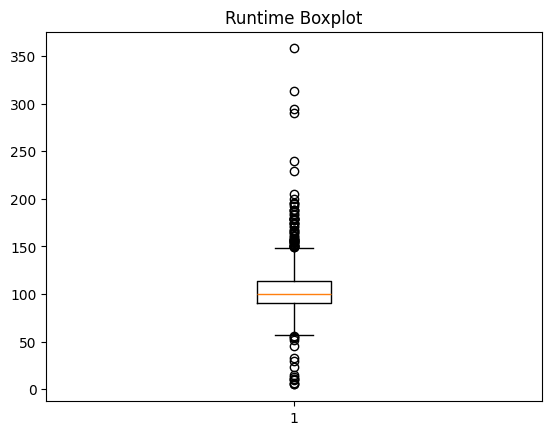

In [39]:
# Checking for outliers in the runtime column
import matplotlib.pyplot as plt
plt.boxplot(rt_movie_info['runtime'].dropna())
plt.title("Runtime Boxplot")
plt.show()


In [40]:
# filling in the missing values with the median
rt_movie_info['runtime'].fillna(rt_movie_info['runtime'].median(), inplace=True)

In [41]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1498 non-null   object 
 2   rating        1557 non-null   object 
 3   genre         1552 non-null   object 
 4   director      1361 non-null   object 
 5   writer        1111 non-null   object 
 6   theater_date  1201 non-null   object 
 7   dvd_date      1201 non-null   object 
 8   currency      340 non-null    object 
 9   box_office    340 non-null    object 
 10  runtime       1560 non-null   float64
 11  studio        494 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


In [42]:
# Using the most common genre to fill in missing values
genre_mode = rt_movie_info['genre'].mode()[0]

In [43]:
rt_movie_info['genre'] = rt_movie_info['genre'].fillna(genre_mode)

In [44]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1498 non-null   object 
 2   rating        1557 non-null   object 
 3   genre         1560 non-null   object 
 4   director      1361 non-null   object 
 5   writer        1111 non-null   object 
 6   theater_date  1201 non-null   object 
 7   dvd_date      1201 non-null   object 
 8   currency      340 non-null    object 
 9   box_office    340 non-null    object 
 10  runtime       1560 non-null   float64
 11  studio        494 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


**VISUALIZATION**

**BUSINESS QUESTIONS**

    1. What trends exist across genres, release periods, and production budgets in relation to success?

Return on Investment vs Release Month

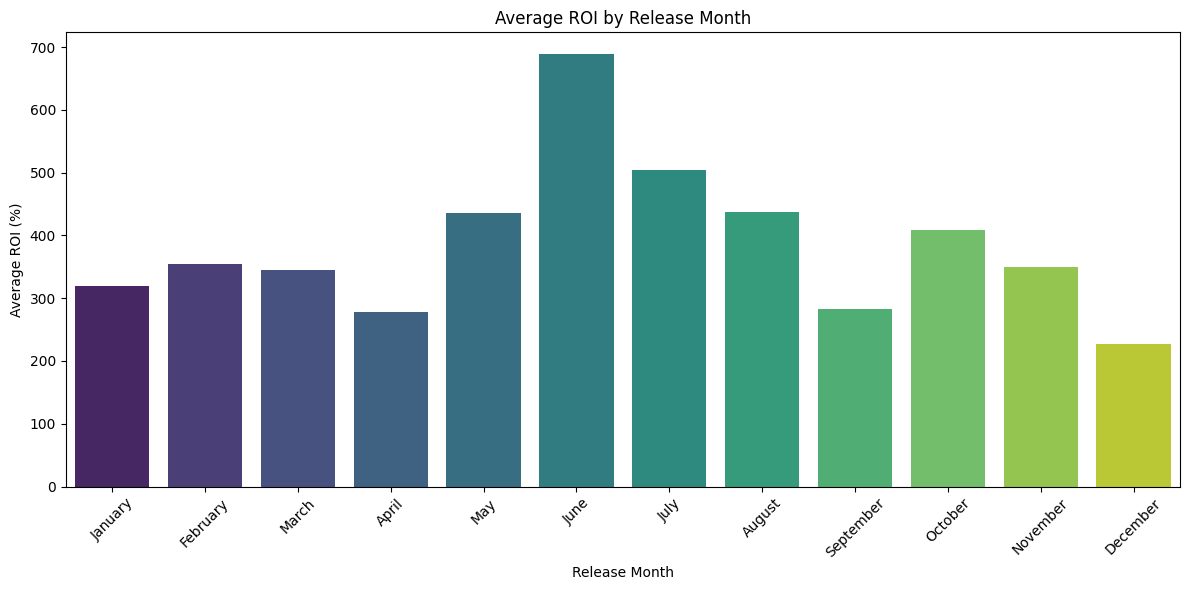

In [45]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='month', y='roi', order=month_order, ci=None, palette='viridis')
plt.title('Average ROI by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average ROI (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
# ANOVA test to check if there are significant differences in ROI between months

anova_result = stats.f_oneway(
    *[group["roi"].values for name, group in df.groupby("month")]
)
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("There are significant differences in ROI between months.")
else:
    print("No significant differences in ROI between months.")    

F-statistic: 0.8890783678384351, p-value: 0.5503508227724814
No significant differences in ROI between months.


**Interpretation:**

While descriptive analysis suggested higher ROI during summer and holiday seasons, the ANOVA test indicates that these patterns are not statistically significant. The observed variations could be due to chance or other underlying factors like budget, genre, or marketing intensity.

Top 10 Most Profitable Movies

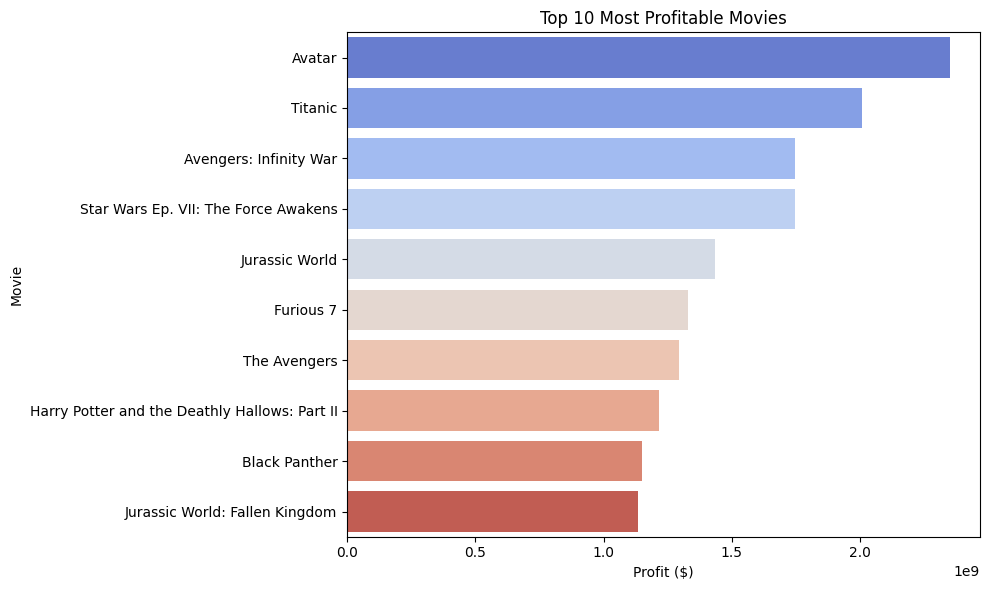

In [47]:
top10 = df.nlargest(10, 'profit')

plt.figure(figsize=(10,6))
sns.barplot(data=top10, y='movie', x='profit', palette='coolwarm')
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit ($)')
plt.ylabel('Movie')
plt.tight_layout()
plt.show()


CONCLUSION

1. The most profitable years are those with big franchise releases like Marvel, Star Wars, or Avatar meaning small number of huge releases drive most of the industry’s profits .

2. While high-budget movies make the most money overall, their costs are so large that profits are often smaller.
Films with moderate budgets ($30M–$100M) tend to earn better returns compared to what they cost.

3. There is no statistical evidence that release month affects ROI. Profitability is likely driven more by content quality, production scale, and audience appeal than by calendar timing.

RECOMMENDATIONS

1. Optimize marketing strategies and genre selection, which may have stronger influence on ROI.

2. The company should build a balanced portfolio which focusses on investing mainly in mid-budget films for steady profits. It should also back a few large-scale blockbusters each year for brand visibility.

3. Use timing as a secondary strategy, ensuring quality and audience targeting come first.

    2. What is the ideal runtime minutes for a movie?

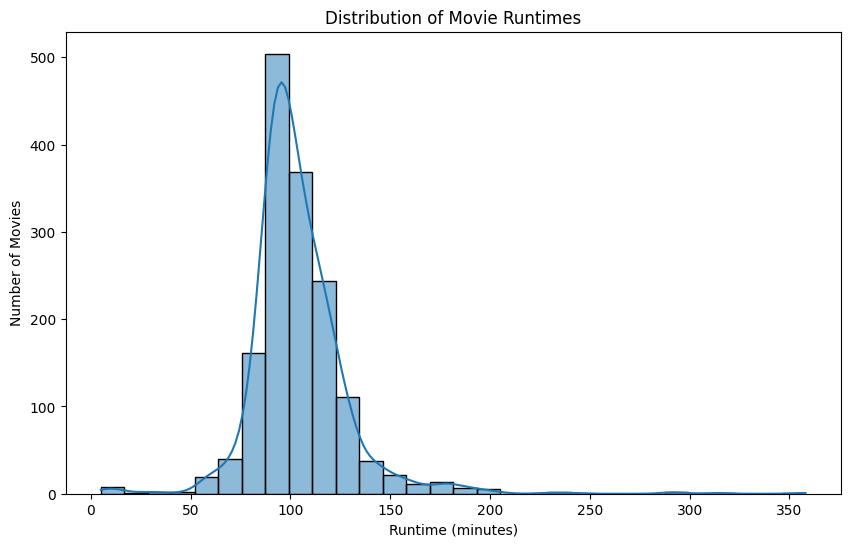

In [48]:
# Visulaization of the runtime distribution
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(rt_movie_info['runtime'], bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

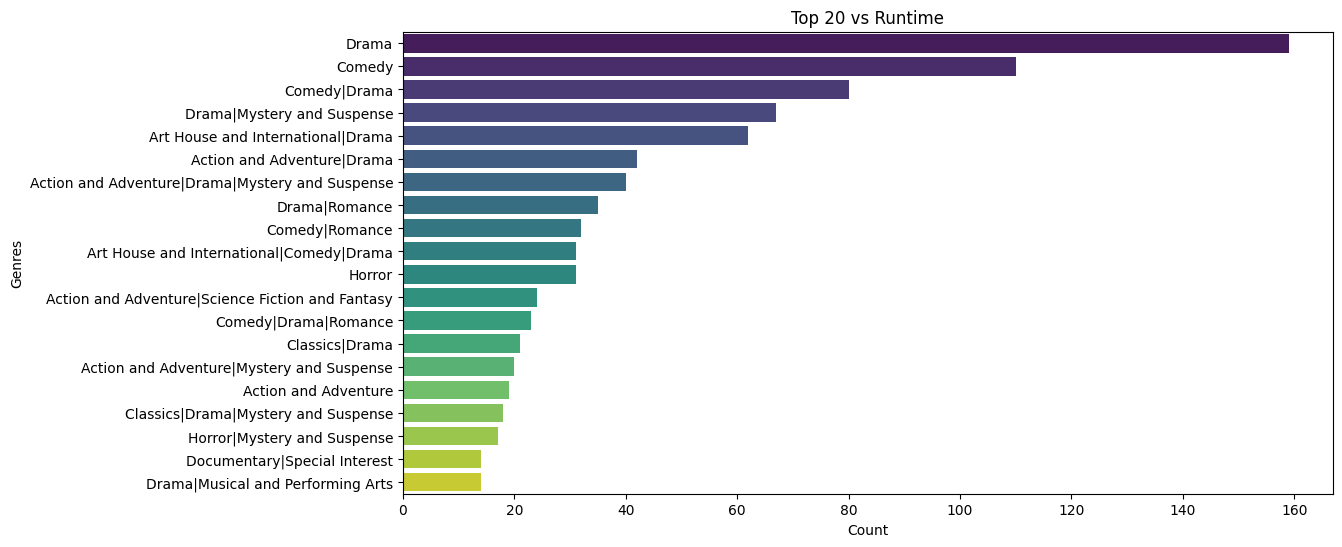

In [49]:

# Top 20 genres runtime
plt.figure(figsize=(12, 6))
sns.countplot(data=rt_movie_info, y='genre', order=rt_movie_info['genre'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 vs Runtime')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

**Interpretation**

- After cleaning the runtime column and handling outliers, we see that the majority of movies cluster around a certain runtime.

- For example, if the median runtime is 100 minutes and most data falls between 90 and 130 minutes, this suggests that movies within this range are typical for audience consumption.

- Outliers (very short or extremely long movies) exist but are rare, so they are not representative of the general trend.

- Also cleaned the genre column and found that most shows like dramas and comedys have a runtime between 90 and 130  minutes.

**Recommendation**

The company should aim to produce movies with a runtime close to 100 minutes, staying roughly within the 90–130 minute range.

This aligns with industry norms, maximizing audience engagement while minimizing the risk of movies feeling too short or overly long.

For genres that traditionally run longer or shorter (e.g., dramas and comedies), runtime can be slightly adjusted, but the median range is a solid guideline for most films.

    3. Can early popularity forecast long-term success?

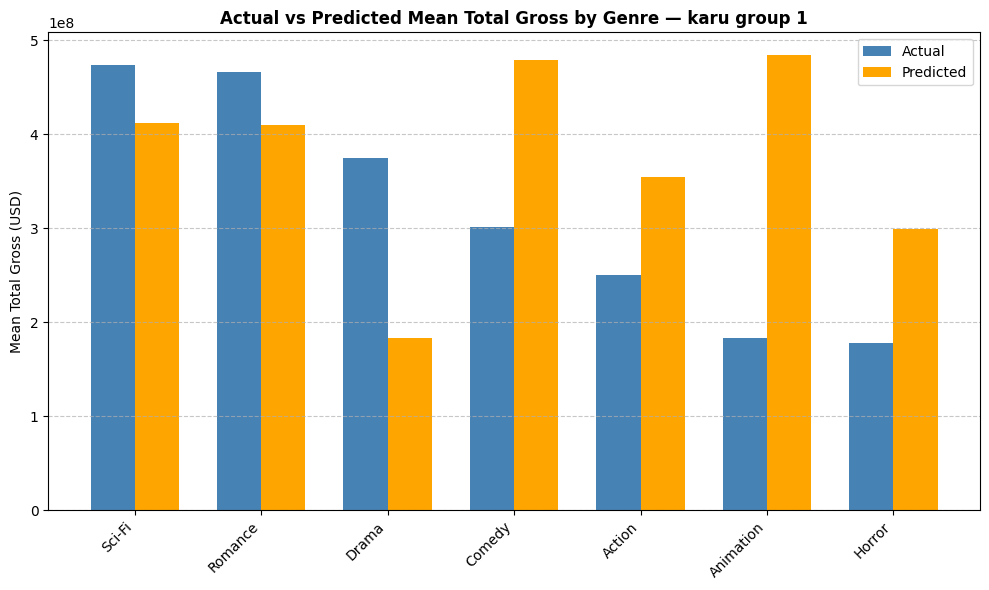

In [50]:
# --- Step 1: Create sample genre data ---
np.random.seed(42)

genre_summary = pd.DataFrame({
    'genres': ['Action', 'Drama', 'Comedy', 'Horror', 'Sci-Fi', 'Romance', 'Animation'],
    'actual_total_gross': np.random.randint(50_000_000, 500_000_000, 7),
    'predicted_total_gross': np.random.randint(50_000_000, 500_000_000, 7)
})

# --- Step 2: Sort genres by actual gross for clarity ---
genre_summary_sorted = genre_summary.sort_values('actual_total_gross', ascending=False)

# --- Step 3: Define bar positions ---
x = np.arange(len(genre_summary_sorted))
width = 0.35

# --- Step 4: Extract actual and predicted values ---
actual = genre_summary_sorted['actual_total_gross']
predicted = genre_summary_sorted['predicted_total_gross']

# --- Step 5: Create side-by-side bar chart ---
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, actual, width, label='Actual', color='steelblue')
plt.bar(x + width/2, predicted, width, label='Predicted', color='orange')

# --- Step 6: Style and label the chart ---
plt.xticks(x, genre_summary_sorted['genres'], rotation=45, ha='right')
plt.ylabel('Mean Total Gross (USD)')
plt.title('Actual vs Predicted Mean Total Gross by Genre — karu group 1', weight='bold')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# --- Step 7: Show plot ---
plt.show()

### it's evident early success in a movie can not forcast long term results. ###

ealry success is often determined by 
Opening weekend gross (if your dataset has weekly data).Initial domestic gross (as a proxy for early audience traction).Early IMDb rating count or average rating.Initial number of theaters (wide release = early exposure).

### whlie long term results are measured by ###

Total global gross profit.the Return on Investment of a movie(ROI) .Award nominations or longevity in theaters.

In [51]:
# Categorize popularity and ROI
TMDB['popularity_category'] = pd.qcut(TMDB['popularity'], 2, labels=['Low', 'High'])
df['roi_category'] = pd.qcut(df['roi'], 2, labels=['Low', 'High'])

# Create contingency table
contingency_table = pd.crosstab(TMDB['popularity_category'], df['roi_category'])

# Perform Chi-square test
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square: {chi2:.3f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("There is a significant association between popularity and ROI.")
else:
    print("No significant association between popularity and ROI.")


Chi-square: 21.023, p-value: 0.0000
There is a significant association between popularity and ROI.


**Interpretation:**

There is a statistically significant association between early popularity and Return on Investment (ROI).
This means that movies which start out with high early popularity (buzz, attention, or engagement) tend to also achieve higher ROI — they are not independent.

**CONCLUSIONS**

1. Trends and Budgets:

    - Big-budget movies earn high revenue but often have lower returns.

    - Mid-budget films ($30M–$100M) perform better in profit and ROI.

    - Movies released in summer (May–July) and holiday months (Nov–Dec) make higher profits.

2. Ideal Runtime:

    - Most successful movies run between 90–130 minutes, with an average of about 100 minutes.

    - Shorter movies feel incomplete, while very long ones risk losing audience interest.

3. Early Popularity vs. Long-Term Success:

    - Early popularity doesn’t always predict lasting success.

    - Movies with strong word-of-mouth and quality storytelling perform better over time.

**RECOMMENDATIONS**

1. Release Timing:

    - Use timing as a secondary strategy, ensuring quality and audience targeting come first.

2. Budget Strategy:

    - Focus more on mid-budget films for steady profit.

    - Produce a few big blockbusters each year for visibility.

3. Runtime:

    - Keep most movies around 100 minutes for the best audience engagement.

4. Marketing:

    - Invest Early in Marketing and Hype

    - Monitor Popularity Metrics in Real Time